---
<h1 align="center"><span style='font-family:Georgia'> Training Crypto_1h Dataset on the linear and formers models </span></h1>
    
---
The aim of this section is to train five diffrent models (DLinear, NLinear, Informer, FEDfromer and PatchTST) on Cryptoh1 cryptocurrency datsets, that preprocessed and explored in `Crypto-Forecasting-EDA-Testing-on-5models` notebook. For each model we will use four diffrent combination of hyperparameters.


---
## Inputs and Outputs
---
##### **Input sequence:**
The input to the Informer model is a time series sequence of fixed length. The sequence contains a set of features, where each feature corresponds to a value measured at a specific time step in the sequence. 
- The length of the input sequence is defined by the `seq_len` hyperparameter.

##### **Output sequence:**

The output of the Informer model is a time series sequence of predicted values, where each value corresponds to a prediction made at a specific time step in the output sequence. 
- The length of the output sequence is defined by the `pred_len` hyperparameter.

---
## Methodology
---

Apply the same Pipline from (Zeng, 2023) to train the linear and formers models  on `Cryptoh1` cryptocurrency datset. Each model is trained using four different combinations of hyperparameters.

**The hyperparameters that are varied for each model include the following:**

| Hyperparameter | Description |
|---|---|
| pred_len | The length of the prediction horizon. |[96, 129, 336, 720]|
| seq_len | The length of the sequence that is used to make a prediction. |336| 
| enc_in | The size of the input sequence to the encoder. | 9|
| dec_in | The size of the input sequence to the decoder. | 9|
| c_out | The size of the output sequence . | 1|


### **Conclusion and Discussion**

Here is a summary of the key findings:

- Informer model performed poorly, with high MAE and MSE values. It struggled to capture the complex patterns present in the cryptocurrency data, resulting in inaccurate predictions.

- Linear models showed better performance compared to the Informer model. It achieved lower MAE and MSE values, indicating better prediction accuracy.

- NLinear model performed similarly to the DLinear model, demonstrating that normalization of data before using a linear model did not significantly impact its performance.

- FEDformer model did not perform well during training, suggesting that it might not be suitable for the given cryptocurrency price prediction task.

- PatchTST also didn't achieve promising results.

In conclusion, the DLinear and NLinear models were the most successful in predicting cryptocurrency prices, outperforming the Informer and FEDformer models. However, further optimization and hyperparameter tuning could potentially enhance the performance of these models. 








---
# Setup
---

In [8]:
!pip install einops 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.8 MB/s eta 0:00:00


In [9]:
!pip install einsum

**Clone the repository from github**

In [3]:
!git clone https://github.com/debi2023-group3/Transformer-based-solutions-for-the-long-term-time-series-forecasting.git

fatal: destination path 'Transformer-based-solutions-for-the-long-term-time-series-forecasting' already exists and is not an empty directory.


**Add project_files to system path**

In [10]:
import os
import sys

os.chdir(os.path.join(os.getcwd(),'Transformer-based-solutions-for-the-long-term-time-series-forecasting'))

print(f'Your current dir: {os.getcwd()}')

if not 'Transformer-based-solutions-for-the-long-term-time-series-forecasting' in sys.path:
    sys.path += ['Transformer-based-solutions-for-the-long-term-time-series-forecasting']

Your current dir: /kaggle/working/Transformer-based-solutions-for-the-long-term-time-series-forecasting


In [11]:
import sys
if not 'Transformer-based-solutions-for-the-long-term-time-series-forecasting' in sys.path:
    sys.path += ['Transformer-based-solutions-for-the-long-term-time-series-forecasting']
    
sys.path

['/kaggle/working',
 '/kaggle/lib/kagglegym',
 '/kaggle/lib',
 '/opt/conda/lib/python310.zip',
 '/opt/conda/lib/python3.10',
 '/opt/conda/lib/python3.10/lib-dynload',
 '',
 '/root/.local/lib/python3.10/site-packages',
 '/opt/conda/lib/python3.10/site-packages',
 '/src/bq-helper',
 'Transformer-based-solutions-for-the-long-term-time-series-forecasting']

**Important library**

In [12]:
import torch
import random
import numpy as np

from exp.exp_DLinear import Exp_Main as Exp_DLinear
from exp.exp_NLinear import Exp_Main as Exp_NLinear
from exp.exp_Informer import Exp_Informer
from exp.exp_FEDformer import Exp_FEDFormer
from exp.exp_PatchTST import Exp_Main as exp_PatchTST

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__
    
args = dotdict()

In [14]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

**GPU Device Hyperparameters**

In [15]:
######################### Device Hyperparameters  ##########################
args.use_multi_gpu = False
args.num_workers = 0
args.use_gpu = torch.cuda.is_available() 
args.gpu = 0                           # The index of the GPU to use.

In [16]:
# !rm -r /kaggle/working/Transformer-based-solutions-for-the-long-term-time-series-forecasting

**Dataset Hyperparameters**

In [17]:
######################### Dataset Hyperparameters  ##########################

used_data='crypto_1h'
args.data = 'custom'           # dataset name
args.root_path = './Datasets/CustomData/' # root path of data file
args.data_path = 'crypto_1h.csv' # data file
args.features = 'MS'           # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'Open'         # target feature in S or MS task
args.freq = 'h'                # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.timeenc = 1

"""

"""

args.embed = 'timeF'           # time features (date) encoding, options:[timeF, fixed, learned]
args.padding = 0               # the amount of padding to add to the input sequence of the Informer model

**Modeling Hyperparameters**

In [18]:
#### [Encoder and Decoder] - ProbSparse Self-attention Hyperparameters  #####
args.attn = 'prob'              # attention used in encoder, options:[prob, full]
args.d_model = 512              # dimension of model (the dimensionality of the input feature vectors, as well as the query, key, and value vectors in each attention head. )
args.n_heads = 8                # num of heads
args.factor = 5                 # probsparse attn factor

args.dropout = 0.1              # dropout
args.d_ff = 1024                # dimension of fcn in model
args.activation = 'gelu'        # activation used in fcn (gelu => Gaussian Error Linear Unit.)
args.mix = True                 # apply a linear projection to the concatenated outputs of the attention heads. 

# concat[start token series(label_len), zero padding series(pred_len)]
args.enc_in = 24                # encoder input size
args.dec_in = 24                # decoder input size
args.c_out = 1                  # output size
args.e_layers = 2               # num of encoder layers
args.d_layers = 1               # num of decoder layers

args.seq_len = 96              # input sequence length of DLinear encoder
args.label_len = 48             # start token length of DLinear decoder
args.pred_len = 96              # prediction sequence length


"""
The Distilled Informer architecture is a variant of the standard Informer model that
uses fewer layers and fewer attention heads, making it more computationally efficient.
    (1) 1*3 conv1d with ELU activation
    (2) Max pooling  with strid = 2
""" 
args.distil = True  

**Experiment Hyperparameters**



In [19]:
######################### Experiment Hyperparameters  ##########################

args.output_attention = False # whether to output attention in ecoder
args.use_amp = False          # whether to use automatic mixed precision training
args.train_only = True
args.train_epochs = 20        # The number of epochs to train for.
args.batch_size = 32          # The batch size of training input data.
args.learning_rate = 0.01     # learning rate starts from 1e−4, decaying two times smaller every epoch.
args.lradj = 'type1'          # learning rate decayed two times smaller every epoch.
args.loss = 'mse'             # evaluating criteria
args.patience = 3             # The number of epochs to wait before early stopping.
args.des = 'Exp'              # The description of the experiment.
args.itr  = 1

######################### Formers Hyperparameters  ##########################
args.modes=32
args.moving_avg=[12]
"""
0: No embeddings are used (default).
1: All three embeddings are used (value embedding + temporal embedding + positional embedding).
2: Value and temporal embeddings are used.
3: Value and positional embeddings are used.
4: Only value embedding is used.
"""
args.embed_type= 1


args.model = 'DLinear' 
args.checkpoints = './Checkpoints/DLinear_checkpoints' # location of model checkpoints


---
# Working on DLinear
---

## Trail 1: DLinear, Dataset:Cryptoh1,  Prediction length: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [15]:
args.seq_len = 96
args.model = 'DLinear' 
args.checkpoints = './Checkpoints/DLinear_checkpoints' # location of model checkpoints

Exp = Exp_DLinear

In [16]:
args.pred_len = 96
setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of DLinear_train_on_crypto_1h_96:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 96, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'DLinear', 'checkpoints': './Checkpoints/DLinear_checkpoints'}


### Training

In [17]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 32346
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.0172543 (MSE)
    Speed: 0.0088 sec/iter 
    Left time: 173.0897 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.0259801 (MSE)
    Speed: 0.0031 sec/iter 
    Left time: 58.8702 sec
--------------------------------------------------------------------------------
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 1010 	 Train Loss: 0.0393811
     Validation loss decreased (inf --> 0.039381).  Saving model ...
Updating learning rate to 0.01
Epoch: 2, Iters: 500
---------------------------

Model(
  (decompsition): series_decomp(
    (moving_avg): moving_avg(
      (avg): AvgPool1d(kernel_size=(25,), stride=(1,), padding=(0,))
    )
  )
  (Linear_Seasonal): Linear(in_features=96, out_features=96, bias=True)
  (Linear_Trend): Linear(in_features=96, out_features=96, bias=True)
)

### Testing

test 6412
mae:0.15142638981342316, mse:0.05977650359272957, rmse:0.2444923371076584, mape:0.12694838643074036, mspe:0.28422123193740845


<Figure size 1500x500 with 0 Axes>

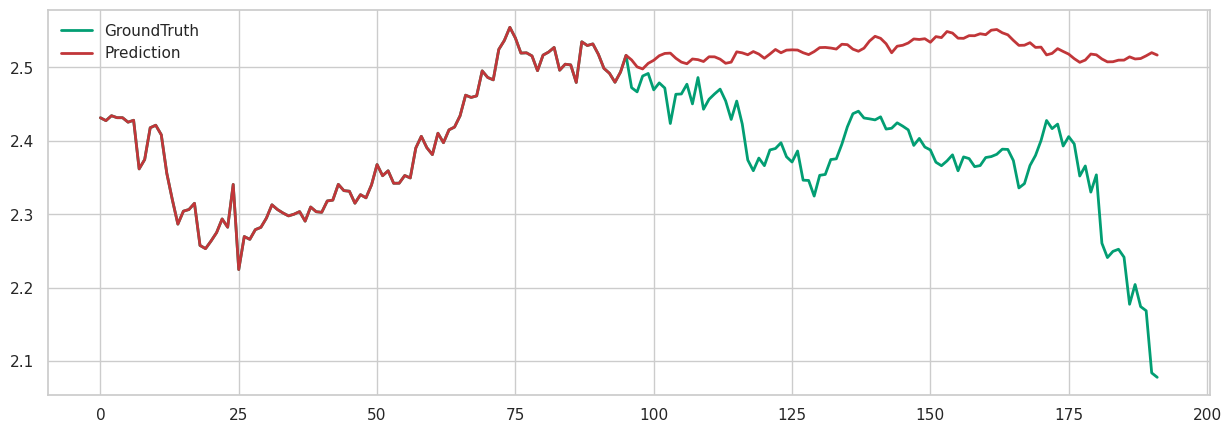

In [18]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [19]:
del crypto_exp

---
## Trail 2: DLinear, Dataset: Cryptoh1 , Prediction length: 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [20]:
args.pred_len = 192
args.train_epochs = 20

setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of DLinear_train_on_crypto_1h_192:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 192, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'DLinear', 'checkpoints': './Checkpoints/DLinear_checkpoints'}


### Training

In [21]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 32250
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.1127068 (MSE)
    Speed: 0.0034 sec/iter 
    Left time: 66.1434 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.0503806 (MSE)
    Speed: 0.0033 sec/iter 
    Left time: 63.8359 sec
--------------------------------------------------------------------------------
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 1007 	 Train Loss: 0.0633290
     Validation loss decreased (inf --> 0.063329).  Saving model ...
Updating learning rate to 0.01
Epoch: 2, Iters: 500
----------------------------

Model(
  (decompsition): series_decomp(
    (moving_avg): moving_avg(
      (avg): AvgPool1d(kernel_size=(25,), stride=(1,), padding=(0,))
    )
  )
  (Linear_Seasonal): Linear(in_features=96, out_features=192, bias=True)
  (Linear_Trend): Linear(in_features=96, out_features=192, bias=True)
)

### Testing

test 6316
mae:0.22168081998825073, mse:0.12740276753902435, rmse:0.3569352328777313, mape:0.19592908024787903, mspe:0.8771327137947083


<Figure size 1500x500 with 0 Axes>

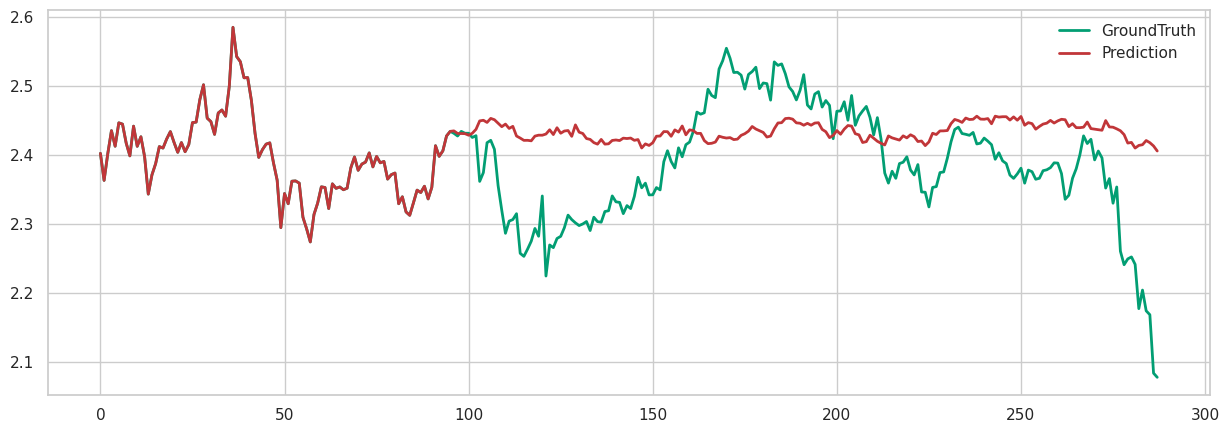

In [22]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [23]:
del crypto_exp

---
## Trail 3: DLinear, Dataset: Cryptoh1,  Prediction length: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [24]:
args.pred_len = 336
args.train_epochs = 20

setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of DLinear_train_on_crypto_1h_336:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 336, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'DLinear', 'checkpoints': './Checkpoints/DLinear_checkpoints'}


### Training

In [25]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 32106
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.0074186 (MSE)
    Speed: 0.0038 sec/iter 
    Left time: 73.8239 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.0469838 (MSE)
    Speed: 0.0037 sec/iter 
    Left time: 69.9424 sec
--------------------------------------------------------------------------------
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 1003 	 Train Loss: 0.0913933
     Validation loss decreased (inf --> 0.091393).  Saving model ...
Updating learning rate to 0.01
Epoch: 2, Iters: 500
----------------------------

Model(
  (decompsition): series_decomp(
    (moving_avg): moving_avg(
      (avg): AvgPool1d(kernel_size=(25,), stride=(1,), padding=(0,))
    )
  )
  (Linear_Seasonal): Linear(in_features=96, out_features=336, bias=True)
  (Linear_Trend): Linear(in_features=96, out_features=336, bias=True)
)

### Testing

test 6172
mae:0.31772828102111816, mse:0.24719364941120148, rmse:0.49718573689460754, mape:0.27357205748558044, mspe:1.5511583089828491


<Figure size 1500x500 with 0 Axes>

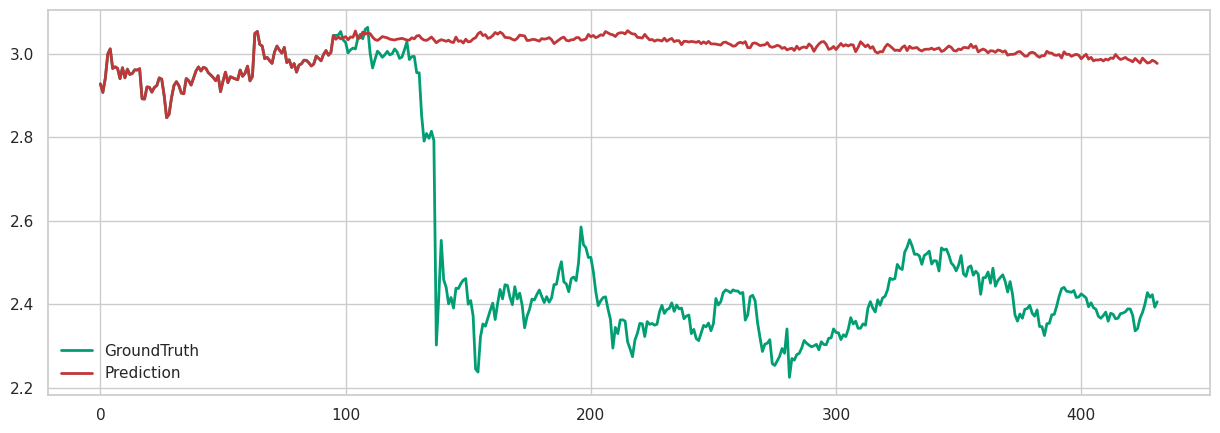

In [26]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [27]:
del crypto_exp

---
## Trail 4: DLinear, Dataset: Cryptoh1,  Prediction length: 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [28]:
args.pred_len = 720
args.train_epochs = 20
setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of DLinear_train_on_crypto_1h_720:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 720, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'DLinear', 'checkpoints': './Checkpoints/DLinear_checkpoints'}


### Training

In [29]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 31722
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.1402696 (MSE)
    Speed: 0.0056 sec/iter 
    Left time: 108.1052 sec
--------------------------------------------------------------------------------
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 991 	 Train Loss: 0.1695938
     Validation loss decreased (inf --> 0.169594).  Saving model ...
Updating learning rate to 0.01
Epoch: 2, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.0491746 (MSE)
    Speed: 0.0095 sec/iter 
    Left time: 174.0494 sec
--------------------------------------------------------------------------------
                                   Epoch 2 Summer

Model(
  (decompsition): series_decomp(
    (moving_avg): moving_avg(
      (avg): AvgPool1d(kernel_size=(25,), stride=(1,), padding=(0,))
    )
  )
  (Linear_Seasonal): Linear(in_features=96, out_features=720, bias=True)
  (Linear_Trend): Linear(in_features=96, out_features=720, bias=True)
)

### Testing

test 5788
mae:0.5200120210647583, mse:0.5867465138435364, rmse:0.7659938335418701, mape:0.3947713077068329, mspe:1.9658221006393433


<Figure size 1500x500 with 0 Axes>

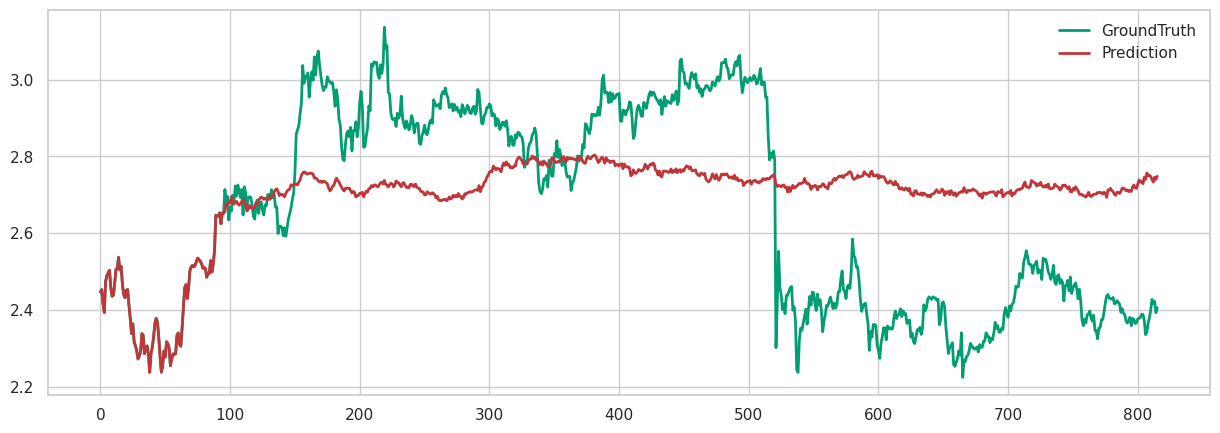

In [30]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

### Conclusion

From the results obtained for different prediction lengths using the DLinear model with a decomposition layer followed by a vanilla linear layer:

| Prediction Length | Test Samples | MAE       | MSE       | RMSE      | MAPE      | MSPE      |
|------------------|--------------|-----------|-----------|-----------|-----------|-----------|
| 96               | 6412         | 0.1514    | 0.0598    | 0.2445    | 0.1269    | 0.2842    |
| 192              | 6316         | 0.2217    | 0.1274    | 0.3569    | 0.1959    | 0.8771    |
| 336              | 6172         | 0.3177    | 0.2472    | 0.4972    | 0.2736    | 1.5512    |
| 720              | 5788         | 0.5200    | 0.5867    | 0.7660    | 0.3948    | 1.9658    |


- **Prediction Length Impact:** As the prediction length increases, the performance of the model deteriorates. This is evident from the increasing values of MAE, MSE as the prediction length goes from 96 to 720. 

- **MAE and RMSE Comparison:** The RMSE is higher than the MAE, it indicates that the model is more sensitive to outliers in the predictions.

---
# Working on NLinear
---

## Trail 1: NLinear, Dataset:Cryptoh1,  Prediction length: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [31]:
args.model = 'NLinear' 
args.checkpoints = './Checkpoints/NLinear_checkpoints' # location of model checkpoints
args.learning_rate = 0.01
args.train_epochs = 30

Exp = Exp_NLinear

In [32]:
args.pred_len = 96
setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_crypto_1h_96:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 96, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 30, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints'}


### Training

In [33]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 32346
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.0348994 (MSE)
    Speed: 0.0027 sec/iter 
    Left time: 81.2479 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.0134755 (MSE)
    Speed: 0.0027 sec/iter 
    Left time: 80.1951 sec
--------------------------------------------------------------------------------
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 1010 	 Train Loss: 0.0167172
     Validation loss decreased (inf --> 0.016717).  Saving model ...
Updating learning rate to 0.01
Epoch: 2, Iters: 500
----------------------------

Model(
  (Linear): Linear(in_features=96, out_features=96, bias=True)
)

### Testing

test 6412
mae:0.15121202170848846, mse:0.05985120311379433, rmse:0.24464505910873413, mape:0.12713941931724548, mspe:0.28568944334983826


<Figure size 1500x500 with 0 Axes>

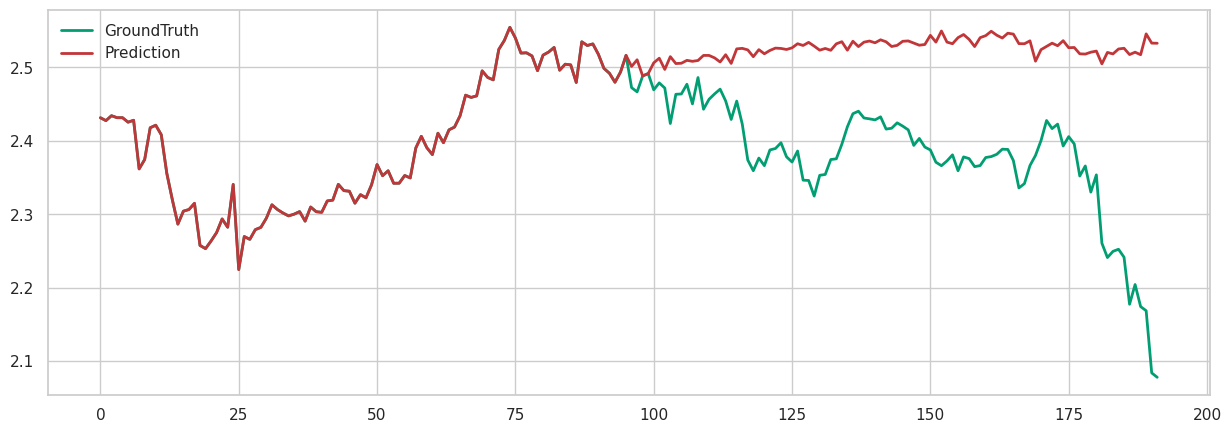

In [34]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [35]:
del crypto_exp

---
## Trail 2: NLinear, Dataset: Cryptoh1 , Prediction length: 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [36]:
args.pred_len = 192
args.train_epochs = 30
setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_crypto_1h_192:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 192, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 30, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints'}


### Training

In [37]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 32250
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.0975875 (MSE)
    Speed: 0.0032 sec/iter 
    Left time: 95.7915 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.0553490 (MSE)
    Speed: 0.0030 sec/iter 
    Left time: 87.1845 sec
--------------------------------------------------------------------------------
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 1007 	 Train Loss: 0.0306777
     Validation loss decreased (inf --> 0.030678).  Saving model ...
Updating learning rate to 0.01
Epoch: 2, Iters: 500
----------------------------

Model(
  (Linear): Linear(in_features=96, out_features=192, bias=True)
)

### Testing

test 6316
mae:0.22064337134361267, mse:0.12787829339504242, rmse:0.35760074853897095, mape:0.19640888273715973, mspe:0.8916869163513184


<Figure size 1500x500 with 0 Axes>

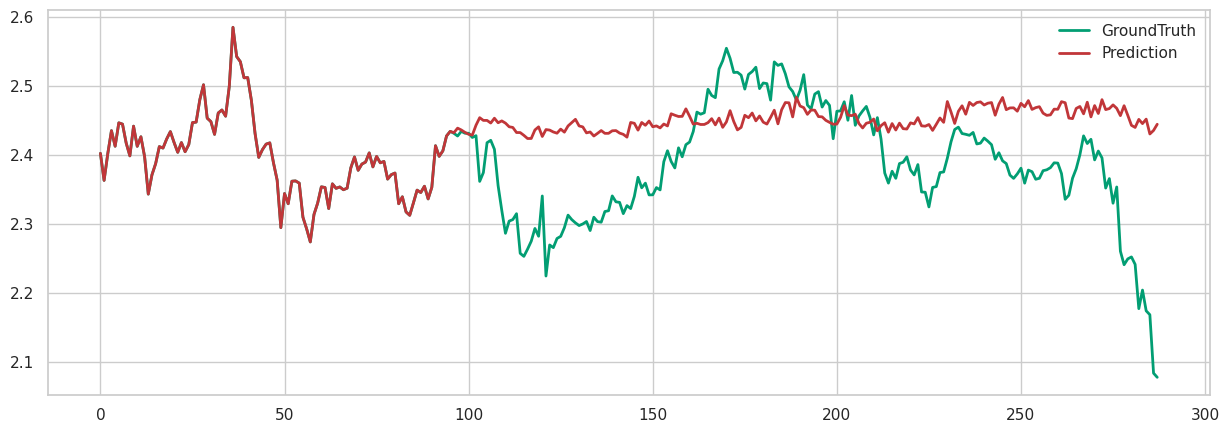

In [38]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [39]:
del crypto_exp

---
## Trail 3: NLinear, Dataset: Cryptoh1,  Prediction length: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [40]:
args.pred_len = 336
args.train_epochs = 30

setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_crypto_1h_336:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 336, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 30, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints'}


### Training

In [41]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 32106
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.0574971 (MSE)
    Speed: 0.0035 sec/iter 
    Left time: 102.5472 sec
--------------------------------------------------------------------------------
Epoch: 1, Iters: 1000
--------------------------------------------------------------------------------
    Loss : 0.0270272 (MSE)
    Speed: 0.0034 sec/iter 
    Left time: 98.8424 sec
--------------------------------------------------------------------------------
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 1003 	 Train Loss: 0.0543646
     Validation loss decreased (inf --> 0.054365).  Saving model ...
Updating learning rate to 0.01
Epoch: 2, Iters: 500
---------------------------

Model(
  (Linear): Linear(in_features=96, out_features=336, bias=True)
)

### Testing

test 6172
mae:0.3154542148113251, mse:0.24926859140396118, rmse:0.4992680549621582, mape:0.274901807308197, mspe:1.6080546379089355


<Figure size 1500x500 with 0 Axes>

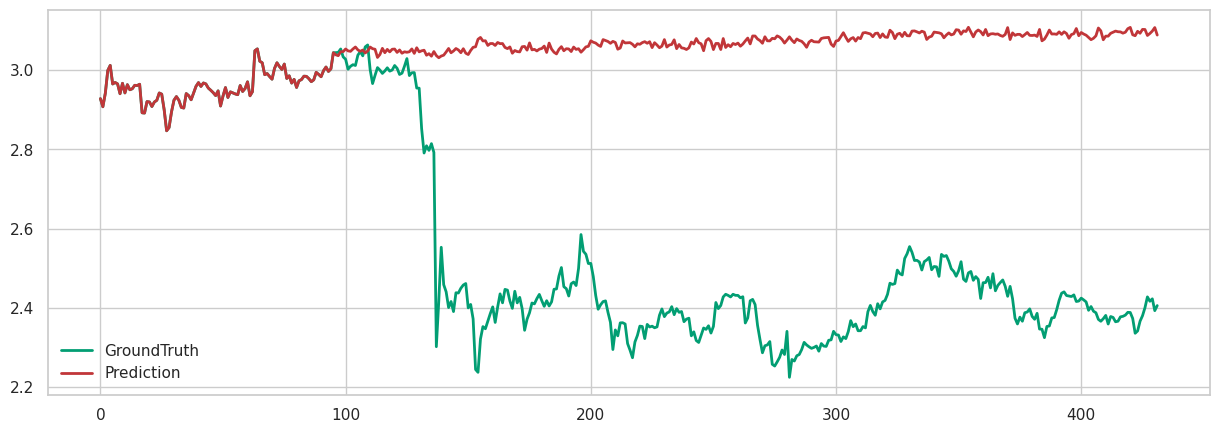

In [42]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [43]:
del crypto_exp

---
## Trail 4: NLinear, Dataset: Cryptoh1,  Prediction length: 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [44]:
args.pred_len = 720
setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of NLinear_train_on_crypto_1h_720:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 720, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 30, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'NLinear', 'checkpoints': './Checkpoints/NLinear_checkpoints'}


### Training

In [45]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 31722
                                   Training                               
Epoch: 1, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.2084752 (MSE)
    Speed: 0.0045 sec/iter 
    Left time: 132.4925 sec
--------------------------------------------------------------------------------
                                   Epoch 1 Summery                          
--------------------------------------------------------------------------------
     Cost time: 1
     Steps: 991 	 Train Loss: 0.1173096
     Validation loss decreased (inf --> 0.117310).  Saving model ...
Updating learning rate to 0.01
Epoch: 2, Iters: 500
--------------------------------------------------------------------------------
    Loss : 0.1174665 (MSE)
    Speed: 0.0088 sec/iter 
    Left time: 249.3670 sec
--------------------------------------------------------------------------------
                                   Epoch 2 Summer

Model(
  (Linear): Linear(in_features=96, out_features=720, bias=True)
)

### Testing

test 5788
mae:0.5176235437393188, mse:0.5908963084220886, rmse:0.7686977982521057, mape:0.3968702256679535, mspe:2.029376268386841


<Figure size 1500x500 with 0 Axes>

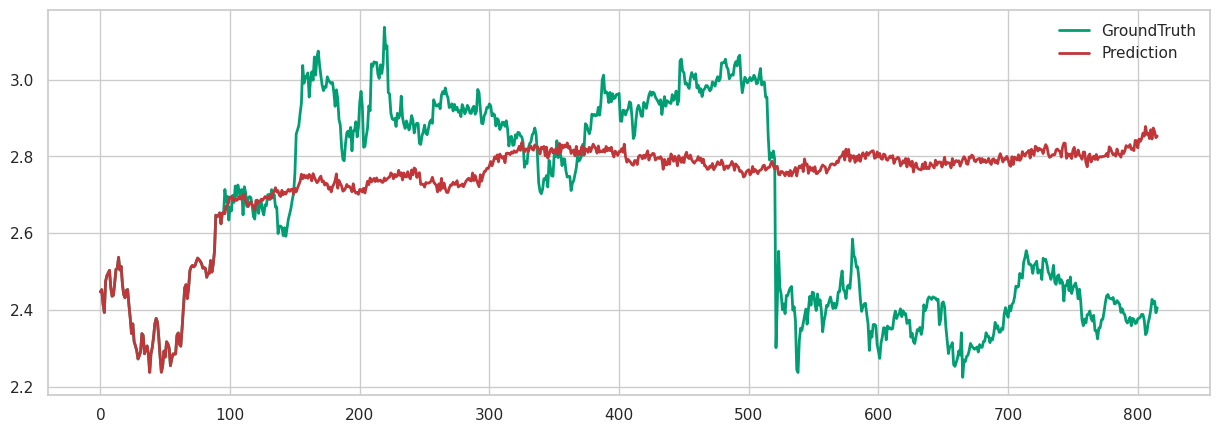

In [46]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [73]:
del crypto_exp

### Conclusion
Here's a summary of the results for the normalization + vanilla linear model in a Markdown table:

| Prediction Length | Test Samples | MAE       | MSE       | RMSE      | MAPE      | MSPE      |
|------------------|--------------|-----------|-----------|-----------|-----------|-----------|
| 96               | 6412         | 0.1512    | 0.0599    | 0.2446    | 0.1271    | 0.2857    |
| 192              | 6316         | 0.2206    | 0.1279    | 0.3576    | 0.1964    | 0.8917    |
| 336              | 6172         | 0.3155    | 0.2493    | 0.4993    | 0.2749    | 1.6081    |
| 720              | 5788         | 0.5176    | 0.5909    | 0.7687    | 0.3969    | 2.0294    |


- Comparing the results between DLinear and NLineat models, we can observe that the NLinear model generally performs slightly better than the DLinear model. 
- MSPE is higher for NLinear model, suggesting that the model's predictions may still have significant errors relative to the true values.
- Both models exhibit a similar pattern, where the performance deteriorates with an increase in prediction length. This is expected since longer-term predictions are generally more challenging and subject to higher uncertainty. 


---
# Working on Informer
---

## Trail 1: Informer, Dataset:Cryptoh1,  Prediction length: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [20]:
args.model = 'informer' 
args.checkpoints = './Checkpoints/Informer_checkpoints' # location of model checkpoints
args.pred_len = 96
args.train_epochs = 6
args.learning_rate = 0.01

Exp = Exp_Informer

setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of informer_train_on_crypto_1h_96:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 96, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 6, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'informer', 'checkpoints': './Checkpoints/Informer_checkpoints'}


### Training

In [80]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 22584
val 3160
test 6412
	iters:  100, epoch: 1 | loss: 0.5130617
	speed: 0.0939sec/iter | left time: 387.7411sec
	iters:  200, epoch: 1 | loss: 0.5350423
	speed: 0.0840sec/iter | left time: 338.5711sec
	iters:  300, epoch: 1 | loss: 0.1963765
	speed: 0.0832sec/iter | left time: 326.9648sec
	iters:  400, epoch: 1 | loss: 0.1530255
	speed: 0.0818sec/iter | left time: 313.2811sec
	iters:  500, epoch: 1 | loss: 0.1400303
	speed: 0.0809sec/iter | left time: 301.8094sec
	iters:  600, epoch: 1 | loss: 0.1506793
	speed: 0.0803sec/iter | left time: 291.6157sec
	iters:  700, epoch: 1 | loss: 0.0898494
	speed: 0.0794sec/iter | left time: 280.3832sec
Epoch: 1 cost time: 58.781800985336304
Epoch: 1, Steps: 705 | Train Loss: 0.6789348 Vali Loss: 0.3145657 Test Loss: 2220.6582031
>>> Validation loss decreased (inf --> 0.314566).  Saving model ...
Updating learning rate to 0.01
	iters:  100, epoch: 2 | loss: 0.0608204
	speed: 0.1755sec/iter | left time: 601.3309sec
	iters:  200,

Informer(
  (enc_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=True)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (dec_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=True)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-1): 2 x EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): ProbAttention(
            (dropout): Drop

### Testing

test 6412
test shape: (6400, 96, 1) (6400, 96, 1)
mae:40.317813873291016, mse:2194.351318359375, rmse:46.843902587890625, mape:0.8367364406585693, mspe:0.7536925673484802


<Figure size 1500x500 with 0 Axes>

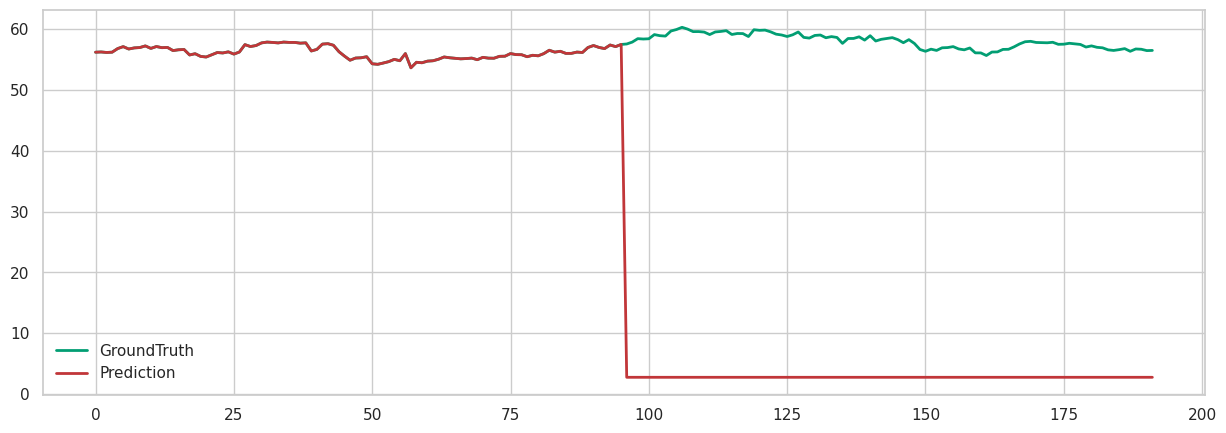

In [81]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [82]:
del crypto_exp

---
## Trail 2: Informer, Dataset: Cryptoh1 , Prediction length: 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [83]:
args.train_epochs = 6
args.pred_len = 192
setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of informer_train_on_crypto_1h_192:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 192, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 6, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'informer', 'checkpoints': './Checkpoints/Informer_checkpoints', 'fc_dropout': 0.3, 'head_dropout': 0, 'stride': 4, 'patch_len': 16, 'num_patch': 42}


### Training

In [84]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 22488
val 3064
test 6316
	iters:  100, epoch: 1 | loss: 0.4138807
	speed: 0.0988sec/iter | left time: 406.3630sec
	iters:  200, epoch: 1 | loss: 0.0864717
	speed: 0.0993sec/iter | left time: 398.4155sec
	iters:  300, epoch: 1 | loss: 0.1250135
	speed: 0.0998sec/iter | left time: 390.6159sec
	iters:  400, epoch: 1 | loss: 0.0620619
	speed: 0.0995sec/iter | left time: 379.3778sec
	iters:  500, epoch: 1 | loss: 0.1230121
	speed: 0.0995sec/iter | left time: 369.3064sec
	iters:  600, epoch: 1 | loss: 0.1420144
	speed: 0.0998sec/iter | left time: 360.6986sec
	iters:  700, epoch: 1 | loss: 0.0923283
	speed: 0.0992sec/iter | left time: 348.6563sec
Epoch: 1 cost time: 69.84930062294006
Epoch: 1, Steps: 702 | Train Loss: 0.4440339 Vali Loss: 0.2651246 Test Loss: 2181.9609375
>>> Validation loss decreased (inf --> 0.265125).  Saving model ...
Updating learning rate to 0.01
	iters:  100, epoch: 2 | loss: 0.0874398
	speed: 0.2207sec/iter | left time: 752.7927sec
	iters:  200, 

Informer(
  (enc_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=True)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (dec_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=True)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-1): 2 x EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): ProbAttention(
            (dropout): Drop

### Testing

test 6316
test shape: (6304, 192, 1) (6304, 192, 1)
mae:41.04184341430664, mse:2250.7998046875, rmse:47.442596435546875, mape:0.8678699135780334, mspe:0.7901425361633301


<Figure size 1500x500 with 0 Axes>

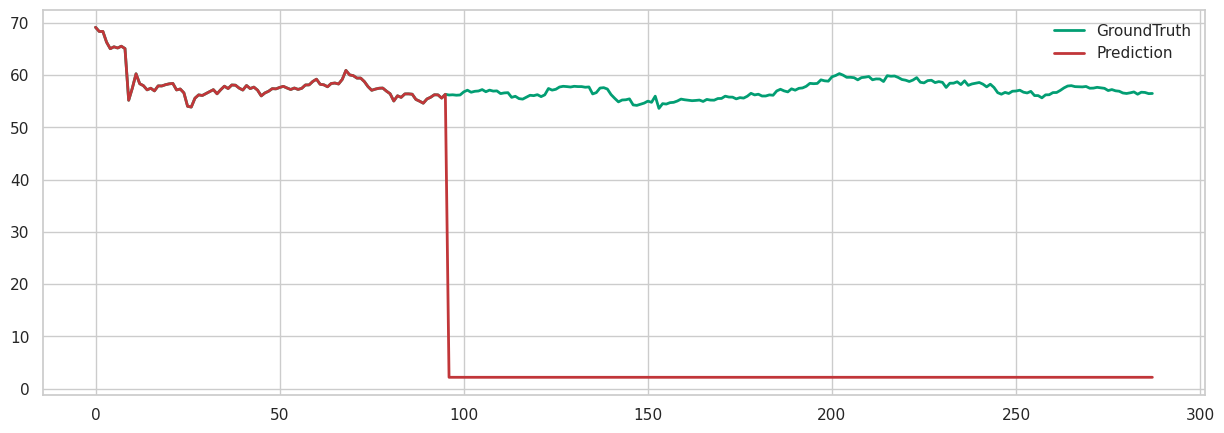

In [85]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [86]:
del crypto_exp

---
## Trail 3: Informer, Dataset: Cryptoh1,  Prediction length: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [87]:
args.pred_len = 336
args.train_epochs = 20

setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of informer_train_on_crypto_1h_336:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 336, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'informer', 'checkpoints': './Checkpoints/Informer_checkpoints', 'fc_dropout': 0.3, 'head_dropout': 0, 'stride': 4, 'patch_len': 16, 'num_patch': 42}


### Training

In [88]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 22344
val 2920
test 6172
	iters:  100, epoch: 1 | loss: 0.3245315
	speed: 0.1324sec/iter | left time: 1835.3324sec
	iters:  200, epoch: 1 | loss: 0.2042811
	speed: 0.1324sec/iter | left time: 1821.5545sec
	iters:  300, epoch: 1 | loss: 0.1520237
	speed: 0.1329sec/iter | left time: 1815.0334sec
	iters:  400, epoch: 1 | loss: 0.1730009
	speed: 0.1322sec/iter | left time: 1793.0879sec
	iters:  500, epoch: 1 | loss: 0.0793299
	speed: 0.1327sec/iter | left time: 1785.7917sec
	iters:  600, epoch: 1 | loss: 0.0939755
	speed: 0.1320sec/iter | left time: 1764.0645sec
Epoch: 1 cost time: 92.46355843544006
Epoch: 1, Steps: 698 | Train Loss: 0.5360591 Vali Loss: 0.1355204 Test Loss: 2262.5266113
>>> Validation loss decreased (inf --> 0.135520).  Saving model ...
Updating learning rate to 0.01
	iters:  100, epoch: 2 | loss: 0.1400292
	speed: 0.4193sec/iter | left time: 5519.7129sec
	iters:  200, epoch: 2 | loss: 0.1120256
	speed: 0.1321sec/iter | left time: 1725.3231sec
	iters

Informer(
  (enc_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=True)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (dec_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=True)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-1): 2 x EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): ProbAttention(
            (dropout): Drop

### Testing

test 6172
test shape: (6144, 336, 1) (6144, 336, 1)
mae:41.293704986572266, mse:2262.525634765625, rmse:47.56601333618164, mape:0.8757503032684326, mspe:0.7982743978500366


<Figure size 1500x500 with 0 Axes>

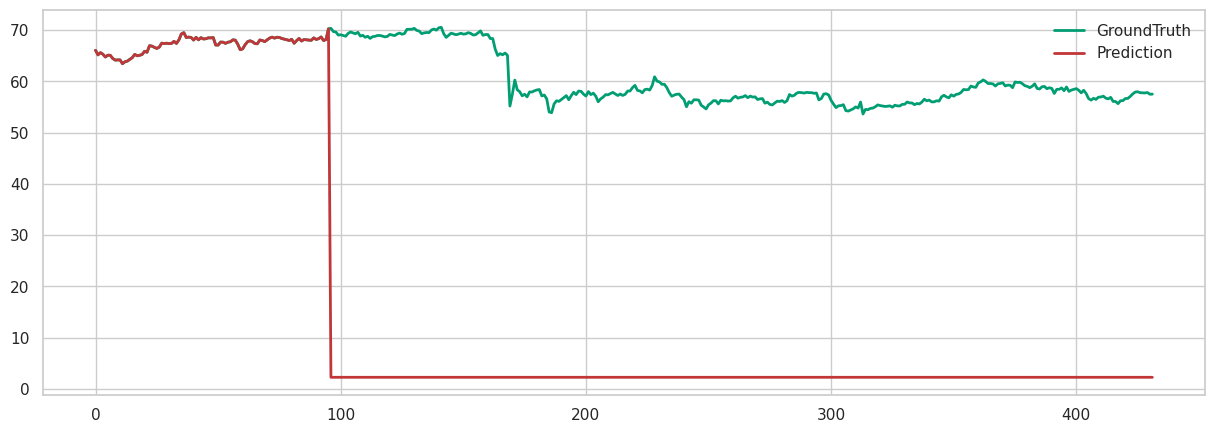

In [89]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [90]:
del crypto_exp

---
## Trail 4: Informer, Dataset: Cryptoh1,  Prediction length: 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [91]:
args.pred_len = 720
args.learning_rate = 0.01

setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of informer_train_on_crypto_1h_720:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 720, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 20, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'informer', 'checkpoints': './Checkpoints/Informer_checkpoints', 'fc_dropout': 0.3, 'head_dropout': 0, 'stride': 4, 'patch_len': 16, 'num_patch': 42}


### Training

In [92]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 21960
val 2536
test 5788
	iters:  100, epoch: 1 | loss: 1.0243955
	speed: 0.2305sec/iter | left time: 3139.4095sec
	iters:  200, epoch: 1 | loss: 0.3557791
	speed: 0.2324sec/iter | left time: 3142.2649sec
	iters:  300, epoch: 1 | loss: 0.4554996
	speed: 0.2322sec/iter | left time: 3116.4348sec
	iters:  400, epoch: 1 | loss: 0.2827936
	speed: 0.2313sec/iter | left time: 3080.7684sec
	iters:  500, epoch: 1 | loss: 0.4853278
	speed: 0.2304sec/iter | left time: 3046.5556sec
	iters:  600, epoch: 1 | loss: 0.1887325
	speed: 0.2302sec/iter | left time: 3020.9648sec
Epoch: 1 cost time: 158.66768956184387
Epoch: 1, Steps: 686 | Train Loss: 0.8066188 Vali Loss: 0.3125421 Test Loss: 2313.7548828
>>> Validation loss decreased (inf --> 0.312542).  Saving model ...
Updating learning rate to 0.01
	iters:  100, epoch: 2 | loss: 0.2061490
	speed: 0.6925sec/iter | left time: 8957.7237sec
	iters:  200, epoch: 2 | loss: 0.2753465
	speed: 0.2309sec/iter | left time: 2963.9042sec
	iter

Informer(
  (enc_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=True)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (dec_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=True)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-1): 2 x EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): ProbAttention(
            (dropout): Drop

### Testing

test 5788
test shape: (5760, 720, 1) (5760, 720, 1)
mae:42.24678039550781, mse:2313.754150390625, rmse:48.101497650146484, mape:0.8987986445426941, mspe:0.830949604511261


<Figure size 1500x500 with 0 Axes>

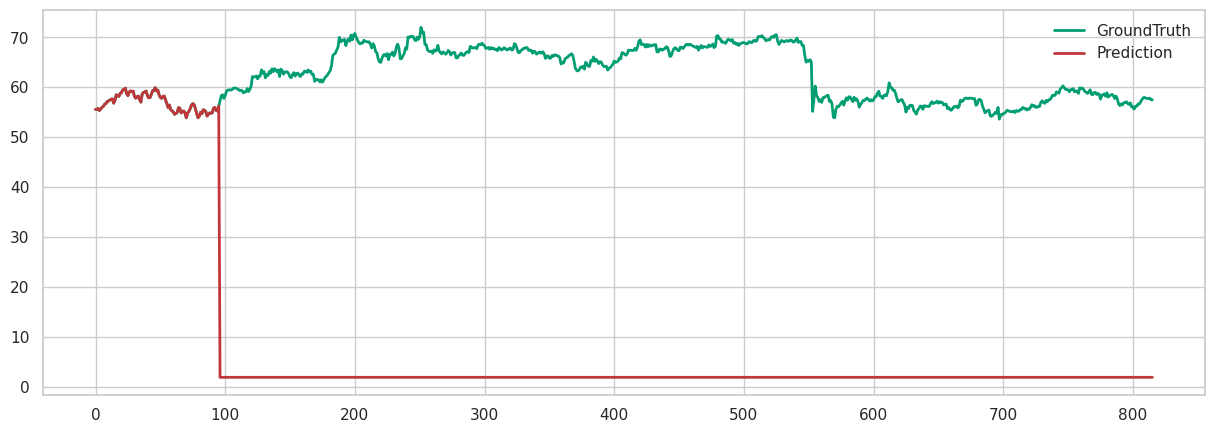

In [93]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [94]:
del crypto_exp

### Conclusion


| Prediction Length | MAE        | MSE           | RMSE      | MAPE   | MSPE       |
|-------------------|------------|--------------|-----------|--------|------------|
| 96                | 40.32      | 2194.35      | 46.84     | 0.837  | 0.754      |
| 192               | 41.04      | 2250.80      | 47.44     | 0.868  | 0.790      |
| 336               | 41.29      | 2262.53      | 47.57     | 0.876  | 0.798      |
| 720               | 42.25      | 2313.75      | 48.10     | 0.899  | 0.831      |

- Due to the complexity of the model, Informer is more prone to overfitting, especially when dealing with smaller datasets or datasets with noisy patterns.
- The relatively high MAE of around 40 for the Informer model indicates that it is struggling to accurately predict the target values. This may be due to overfitting or difficulty in capturing the underlying patterns in the data effectively.



---
# Working on FEDFormer
---

## Trail 1: FEDformer, Dataset:Cryptoh1,  Prediction length: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [21]:
args.model = 'FEDformer' 
args.checkpoints = './Checkpoints/FEDFormer_checkpoints' 
args.learning_rate = 0.01
args.pred_len = 96 
args.dropout = 0.1 

args.pred_len = 96
args.train_epochs = 6

Exp = Exp_FEDFormer

setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of FEDformer_train_on_crypto_1h_96:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 96, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 6, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'FEDformer', 'checkpoints': './Checkpoints/FEDFormer_checkpoints'}


### Training

In [22]:
Exp = Exp_FEDFormer
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 22584
val 3160
test 6412
	iters:  100, epoch: 1 | loss: 32.1244507
	speed: 0.3857sec/iter | left time: 1593.5045sec
	iters:  200, epoch: 1 | loss: 8.5554342
	speed: 0.2703sec/iter | left time: 1089.6648sec
	iters:  300, epoch: 1 | loss: 6.5090055
	speed: 0.2714sec/iter | left time: 1066.6964sec
	iters:  400, epoch: 1 | loss: 4.3567362
	speed: 0.2723sec/iter | left time: 1043.0612sec
	iters:  500, epoch: 1 | loss: 4.4388971
	speed: 0.2711sec/iter | left time: 1011.5527sec
	iters:  600, epoch: 1 | loss: 3.7012753
	speed: 0.2706sec/iter | left time: 982.5610sec
	iters:  700, epoch: 1 | loss: 3.0642998
	speed: 0.2705sec/iter | left time: 955.0401sec
Epoch: 1 cost time: 202.75888752937317
Epoch: 1, Steps: 705 | Train Loss: 5114.5526529 Vali Loss: 3.5174704 Test Loss: 1620.0161133
>>> Validation loss decreased (inf --> 3.517470).  Saving model ...
Updating learning rate to 0.01
	iters:  100, epoch: 2 | loss: 2.8528588
	speed: 0.4030sec/iter | left time: 1380.7076sec
	it

Model(
  (decomp): series_decomp_multi(
    (layer): Linear(in_features=1, out_features=1, bias=True)
  )
  (enc_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=False)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (dec_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=False)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-1): 2 x 

### Testing

test 6412
test shape: (6400, 96, 24) (6400, 96, 1)
mae:30.70919418334961, mse:1586.041015625, rmse:39.825130462646484, mape:0.7102859616279602, mspe:0.6616858839988708


<Figure size 1500x500 with 0 Axes>

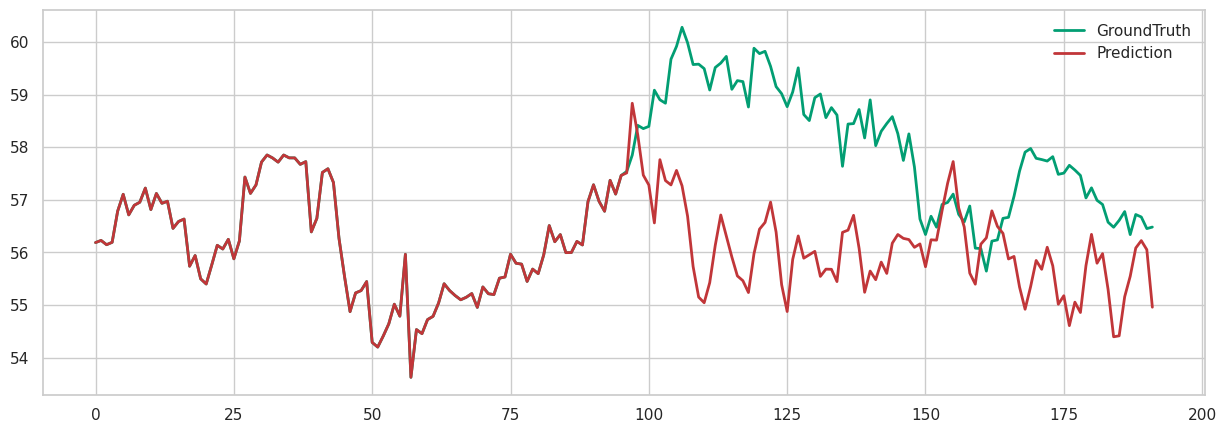

In [23]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [24]:
del crypto_exp

---
## Trail 2: FEDformer, Dataset:Cryptoh1,  Prediction length: 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [25]:
args.pred_len = 192
args.train_epochs = 6

setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of FEDformer_train_on_crypto_1h_192:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 192, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 6, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'FEDformer', 'checkpoints': './Checkpoints/FEDFormer_checkpoints'}


### Training

In [26]:
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 22488
val 3064
test 6316
	iters:  100, epoch: 1 | loss: 62314.7031250
	speed: 0.3220sec/iter | left time: 1324.4303sec
	iters:  200, epoch: 1 | loss: 4623.6176758
	speed: 0.3246sec/iter | left time: 1302.5552sec
	iters:  300, epoch: 1 | loss: 3639.8186035
	speed: 0.3245sec/iter | left time: 1269.5967sec
	iters:  400, epoch: 1 | loss: 1564.0955811
	speed: 0.3241sec/iter | left time: 1235.8777sec
	iters:  500, epoch: 1 | loss: 1120.8144531
	speed: 0.3245sec/iter | left time: 1204.7246sec
	iters:  600, epoch: 1 | loss: 747.0111084
	speed: 0.3247sec/iter | left time: 1173.0078sec
	iters:  700, epoch: 1 | loss: 6312889417728.0000000
	speed: 0.3246sec/iter | left time: 1140.2653sec
Epoch: 1 cost time: 227.76241874694824
Epoch: 1, Steps: 702 | Train Loss: 898188620449.8409424 Vali Loss: 919679664128.0000000 Test Loss: 34507178639360.0000000
>>> Validation loss decreased (inf --> 919679664128.000000).  Saving model ...
Updating learning rate to 0.01
	iters:  100, epoch: 2

Model(
  (decomp): series_decomp_multi(
    (layer): Linear(in_features=1, out_features=1, bias=True)
  )
  (enc_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=False)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (dec_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=False)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-1): 2 x 

### Testing

test 6316
test shape: (6304, 192, 24) (6304, 192, 1)
mae:4325.53369140625, mse:171947872.0, rmse:13112.8896484375, mape:148.17356872558594, mspe:191920.078125


<Figure size 1500x500 with 0 Axes>

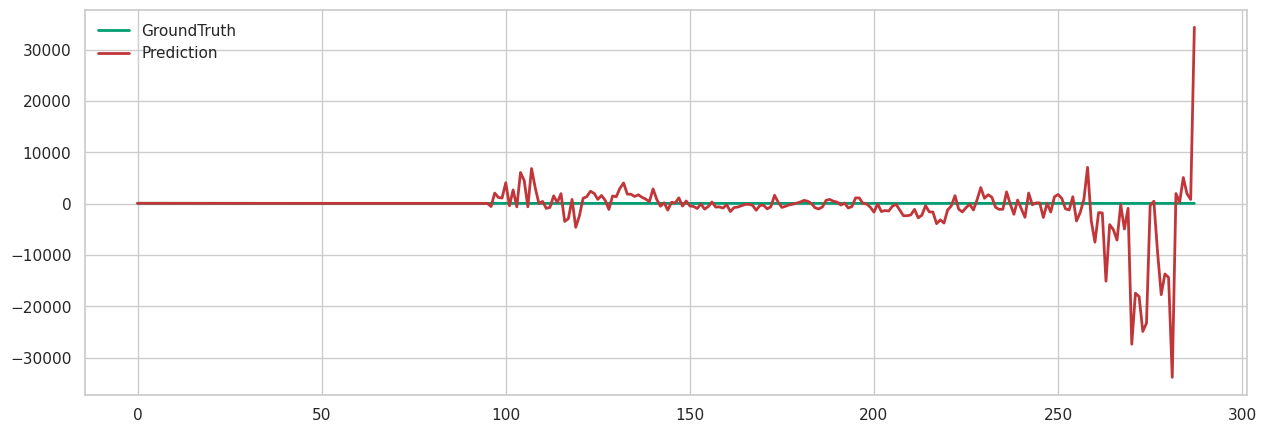

In [27]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [28]:
del crypto_exp

---
## Trail 3: FEDformer, Dataset:Cryptoh1,  Prediction length: 336
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [29]:
args.pred_len = 336
args.train_epochs = 6

setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of FEDformer_train_on_crypto_1h_336:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 336, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 6, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'FEDformer', 'checkpoints': './Checkpoints/FEDFormer_checkpoints'}


### Training

In [30]:
Exp = Exp_FEDFormer
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 22344
val 2920
test 6172
	iters:  100, epoch: 1 | loss: 234.6546021
	speed: 0.4075sec/iter | left time: 1666.3979sec
	iters:  200, epoch: 1 | loss: 68.4432068
	speed: 0.4113sec/iter | left time: 1640.6390sec
	iters:  300, epoch: 1 | loss: 46.6551437
	speed: 0.4107sec/iter | left time: 1597.3230sec
	iters:  400, epoch: 1 | loss: 41.3149223
	speed: 0.4097sec/iter | left time: 1552.4834sec
	iters:  500, epoch: 1 | loss: 28.6164207
	speed: 0.4094sec/iter | left time: 1510.3292sec
	iters:  600, epoch: 1 | loss: 24.4927845
	speed: 0.4109sec/iter | left time: 1474.6237sec
Epoch: 1 cost time: 286.53123903274536
Epoch: 1, Steps: 698 | Train Loss: 51294.0926307 Vali Loss: 5.8646469 Test Loss: 1570.6563721
>>> Validation loss decreased (inf --> 5.864647).  Saving model ...
Updating learning rate to 0.01
	iters:  100, epoch: 2 | loss: 17.9595680
	speed: 0.9944sec/iter | left time: 3372.1635sec
	iters:  200, epoch: 2 | loss: 14.0565615
	speed: 0.4104sec/iter | left time: 1350.

Model(
  (decomp): series_decomp_multi(
    (layer): Linear(in_features=1, out_features=1, bias=True)
  )
  (enc_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=False)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (dec_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=False)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-1): 2 x 

### Testing

test 6172
test shape: (6144, 336, 24) (6144, 336, 1)
mae:31.058015823364258, mse:1554.7562255859375, rmse:39.430397033691406, mape:0.7216646075248718, mspe:0.6687049865722656


<Figure size 1500x500 with 0 Axes>

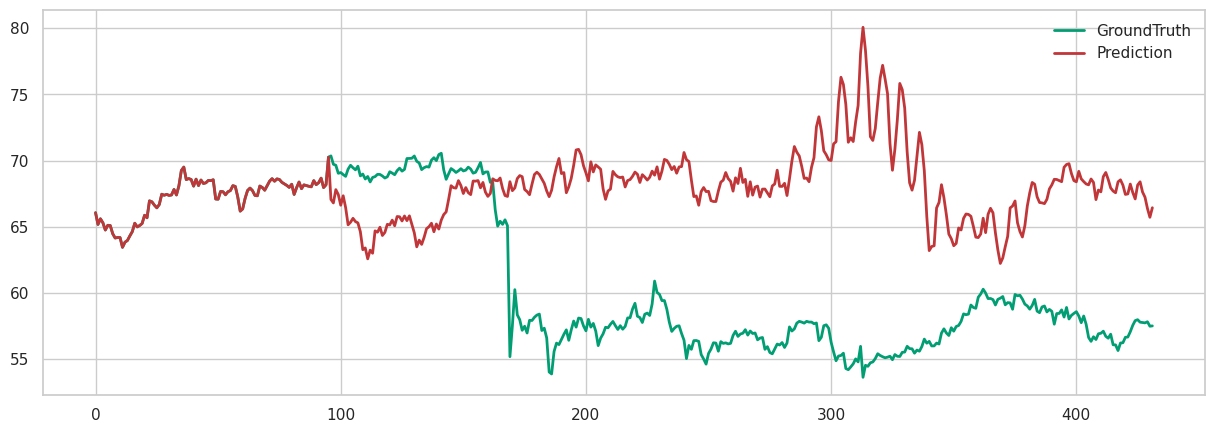

In [31]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

---
## Trail 4: FEDformer, Dataset:Cryptoh1,  Prediction length: 720
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [32]:
args.pred_len = 720
args.train_epochs = 6
args.patience = 3

setting=f'{args.model}_train_on_{used_data}_{args.pred_len}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of FEDformer_train_on_crypto_1h_720:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 512, 'n_heads': 8, 'factor': 5, 'dropout': 0.1, 'd_ff': 1024, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 2, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 720, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 6, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'type1', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'FEDformer', 'checkpoints': './Checkpoints/FEDFormer_checkpoints'}


### Training

In [33]:
Exp = Exp_FEDFormer
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 21960
val 2536
test 5788
	iters:  100, epoch: 1 | loss: 638.4262695
	speed: 0.6381sec/iter | left time: 2563.0617sec
	iters:  200, epoch: 1 | loss: 127.9879913
	speed: 0.6426sec/iter | left time: 2517.2416sec
	iters:  300, epoch: 1 | loss: 87.1644821
	speed: 0.6425sec/iter | left time: 2452.5348sec
	iters:  400, epoch: 1 | loss: 69.2261658
	speed: 0.6428sec/iter | left time: 2389.4239sec
	iters:  500, epoch: 1 | loss: 58.0204086
	speed: 0.6428sec/iter | left time: 2324.9444sec
	iters:  600, epoch: 1 | loss: 50.3213882
	speed: 0.6425sec/iter | left time: 2259.5751sec
Epoch: 1 cost time: 440.9584517478943
Epoch: 1, Steps: 686 | Train Loss: 170294.8981707 Vali Loss: 15.7121849 Test Loss: 2059.7707520
>>> Validation loss decreased (inf --> 15.712185).  Saving model ...
Updating learning rate to 0.01
	iters:  100, epoch: 2 | loss: 38.5653038
	speed: 1.4660sec/iter | left time: 4883.3237sec
	iters:  200, epoch: 2 | loss: 36.5925789
	speed: 0.6430sec/iter | left time: 20

Model(
  (decomp): series_decomp_multi(
    (layer): Linear(in_features=1, out_features=1, bias=True)
  )
  (enc_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=False)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (dec_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(24, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=False)
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-1): 2 x 

### Testing

test 5788
test shape: (5760, 720, 24) (5760, 720, 1)
mae:34.00172805786133, mse:1780.6722412109375, rmse:42.19801330566406, mape:0.7749078273773193, mspe:0.7510278224945068


<Figure size 1500x500 with 0 Axes>

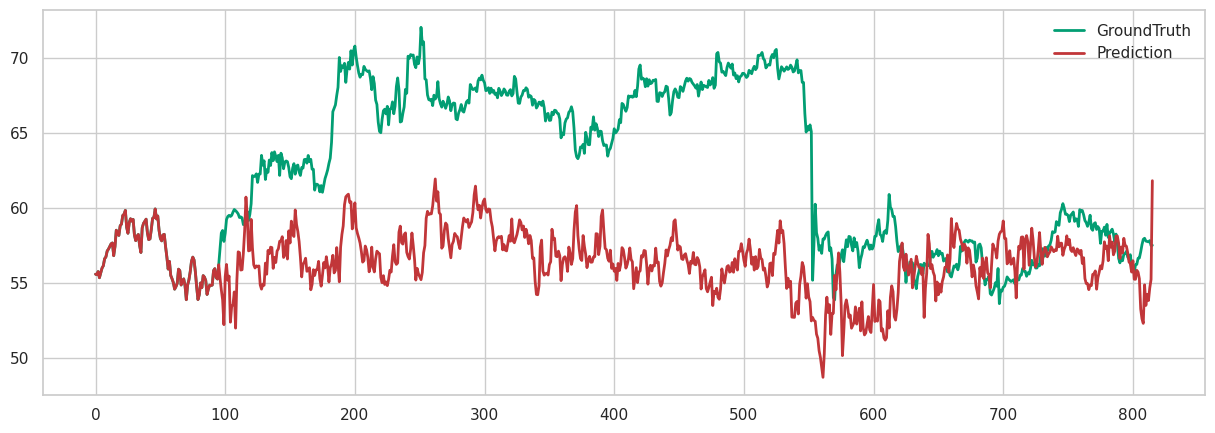

In [34]:
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [35]:
del crypto_exp

### Conclusion


| Prediction Length | MAE        | MSE           | RMSE      | MAPE   | MSPE       |
|-------------------|------------|--------------|-----------|--------|------------|
| 96                | 30.71      | 1586.04      | 39.83     | 0.710  | 0.662      |
| 192               | 4325.53    | 171947872.0  | 13112.89  | 148.17 | 191920.08  |
| 336               | 31.06      | 1554.76      | 39.43     | 0.722  | 0.669      |
| 720               | 34.00      | 1780.67      | 42.20     | 0.775  | 0.751      |



---
# Working on PatchTST
---

## Trail 1: PatchTST, Dataset:Cryptoh1,  Prediction length: 96
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [45]:
args.model = 'PatchTST'
args.lradj ='TST'
args.checkpoints = './Checkpoints/PatchTST_checkpoints' # location of model checkpoints

args.e_layers = 23
args.n_heads=4
args.d_model = 16
args.d_ff=128
args.dropout=0.3
args.fc_dropout = 0.3
args.head_dropout = 0
args.stride = 4

args.patch_len = 16
args.num_patch = 42

args.batch_size = 32
args.train_epochs = 100
args.learning_rate= 0.01
args.patience=5

args.pred_len = 96
Exp = exp_PatchTST

setting=f'{args.model}_train_on_{used_data}_{args.pred_len}_{args.num_patch}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of PatchTST_train_on_crypto_1h_96_42:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 16, 'n_heads': 4, 'factor': 5, 'dropout': 0.3, 'd_ff': 128, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 23, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 96, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 100, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'TST', 'loss': 'mse', 'patience': 5, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'PatchTST', 'checkpoints': './Checkpoints/PatchTST_checkpoints', 'fc_dropout': 0.3, 'head_dropout': 0, 'stride': 4, 'patch_len': 16, 'num_patch': 42}


### Training

In [49]:
%%time

crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 22584
val 3160
test 6412
	iters: 100, epoch: 1 | loss: 0.6392201
	speed: 0.1040s/iter; left time: 7320.2666s
	iters: 200, epoch: 1 | loss: 0.2369369
	speed: 0.0946s/iter; left time: 6649.3655s
	iters: 300, epoch: 1 | loss: 0.2042756
	speed: 0.0950s/iter; left time: 6670.8956s
	iters: 400, epoch: 1 | loss: 0.1914943
	speed: 0.0948s/iter; left time: 6647.3703s
	iters: 500, epoch: 1 | loss: 0.1865000
	speed: 0.0917s/iter; left time: 6417.7242s
	iters: 600, epoch: 1 | loss: 0.2140034
	speed: 0.0910s/iter; left time: 6357.5753s
	iters: 700, epoch: 1 | loss: 0.2487381
	speed: 0.0924s/iter; left time: 6450.1323s
Epoch: 1 cost time: 66.86407828330994
Epoch: 1, Steps: 705 | Train Loss: 0.2832286 Vali Loss: 0.2639019 Test Loss: 1300.0782471
>>> Validation loss decreased (inf --> 0.263902).  Saving model ...
Updating learning rate to 0.00042629738665112514
	iters: 100, epoch: 2 | loss: 0.1804333
	speed: 0.1887s/iter; left time: 13150.7966s
	iters: 200, epoch: 2 | loss: 0.245

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-22): 23 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (

### Testing

test 6412
mae:35.55539321899414, mse:1683.9886474609375, rmse:41.03643035888672, mape:0.7736131548881531, mspe:0.615085780620575
CPU times: user 7.18 s, sys: 439 ms, total: 7.62 s
Wall time: 7.18 s


<Figure size 1500x500 with 0 Axes>

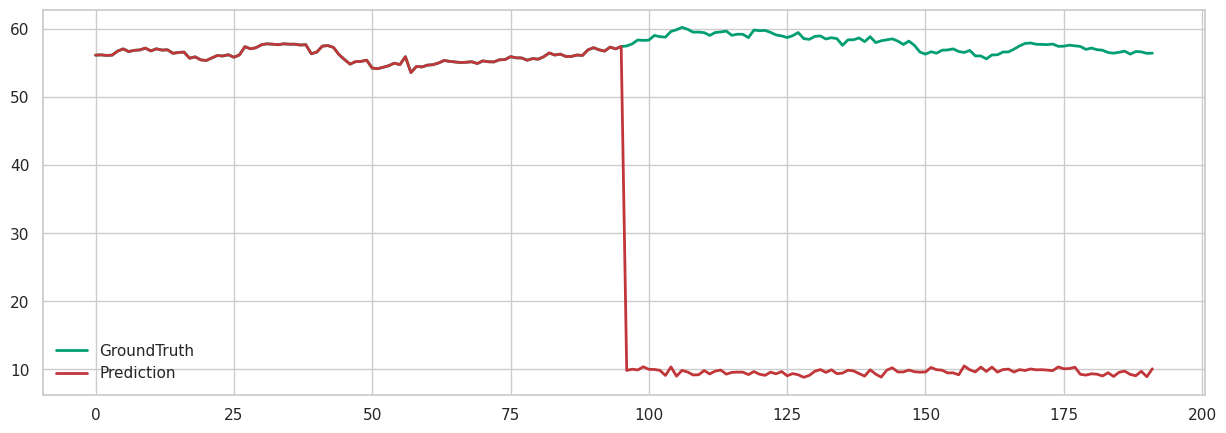

In [50]:
%%time
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [51]:
del crypto_exp

---
## Trail 2: PatchTST, Dataset: Cryptoh1 , Prediction length: 192
### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary

In [52]:
args.pred_len = 192
args.patience  = 3
setting=f'{args.model}_train_on_{used_data}_{args.pred_len}_{args.num_patch}'
print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of PatchTST_train_on_crypto_1h_192_42:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 16, 'n_heads': 4, 'factor': 5, 'dropout': 0.3, 'd_ff': 128, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 23, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 192, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 100, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'TST', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'PatchTST', 'checkpoints': './Checkpoints/PatchTST_checkpoints', 'fc_dropout': 0.3, 'head_dropout': 0, 'stride': 4, 'patch_len': 16, 'num_patch': 42}


### Training

In [53]:
%%time
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 22488
val 3064
test 6316
	iters: 100, epoch: 1 | loss: 0.3435149
	speed: 0.0932s/iter; left time: 6530.4398s
	iters: 200, epoch: 1 | loss: 0.2404388
	speed: 0.0918s/iter; left time: 6428.7894s
	iters: 300, epoch: 1 | loss: 0.1368890
	speed: 0.0951s/iter; left time: 6649.3515s
	iters: 400, epoch: 1 | loss: 0.1449897
	speed: 0.0926s/iter; left time: 6461.5401s
	iters: 500, epoch: 1 | loss: 0.2225956
	speed: 0.0918s/iter; left time: 6395.4624s
	iters: 600, epoch: 1 | loss: 0.4031453
	speed: 0.0926s/iter; left time: 6446.2114s
	iters: 700, epoch: 1 | loss: 0.2216297
	speed: 0.0955s/iter; left time: 6638.4616s
Epoch: 1 cost time: 65.48284602165222
Epoch: 1, Steps: 702 | Train Loss: 0.2695262 Vali Loss: 0.2783428 Test Loss: 1095.3291016
>>> Validation loss decreased (inf --> 0.278343).  Saving model ...
Updating learning rate to 0.0004262973972690553
	iters: 100, epoch: 2 | loss: 0.1324685
	speed: 0.1836s/iter; left time: 12739.6597s
	iters: 200, epoch: 2 | loss: 0.1062

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-22): 23 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (

### Testing

test 6316
mae:28.59290313720703, mse:1095.3291015625, rmse:33.09575653076172, mape:0.6255362033843994, mspe:0.4043172597885132
CPU times: user 6.98 s, sys: 390 ms, total: 7.37 s
Wall time: 6.89 s


<Figure size 1500x500 with 0 Axes>

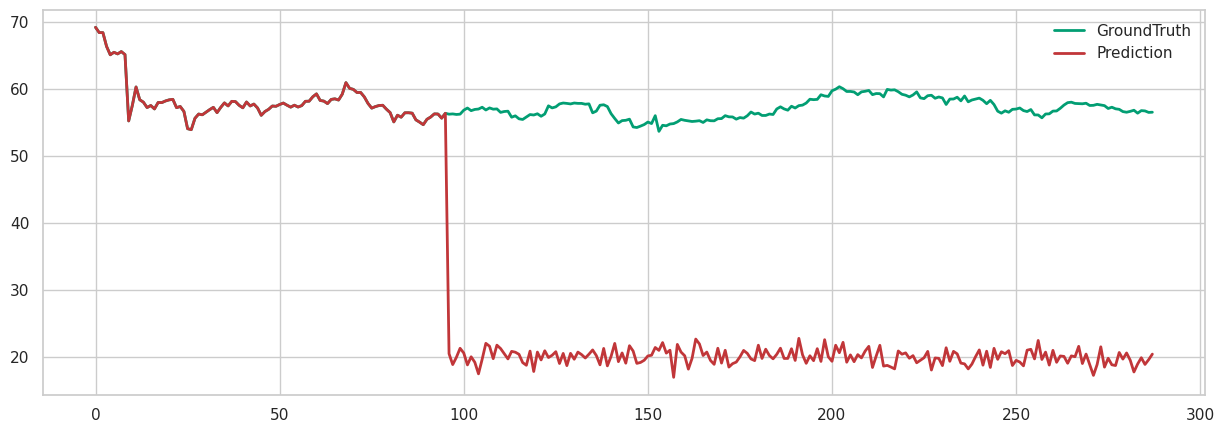

In [54]:
%%time
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [55]:
del crypto_exp

---
## Trail 3: PatchTST, Dataset: Cryptoh1,  Prediction length: 336

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [56]:
args.pred_len = 336

print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of PatchTST_train_on_crypto_1h_192_42:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 16, 'n_heads': 4, 'factor': 5, 'dropout': 0.3, 'd_ff': 128, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 23, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 336, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 100, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'TST', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'PatchTST', 'checkpoints': './Checkpoints/PatchTST_checkpoints', 'fc_dropout': 0.3, 'head_dropout': 0, 'stride': 4, 'patch_len': 16, 'num_patch': 42}


### Training

In [57]:
%%time
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 22344
val 2920
test 6172
	iters: 100, epoch: 1 | loss: 0.4548912
	speed: 0.0952s/iter; left time: 6634.5326s
	iters: 200, epoch: 1 | loss: 0.3566319
	speed: 0.0919s/iter; left time: 6396.7964s
	iters: 300, epoch: 1 | loss: 0.3086531
	speed: 0.0925s/iter; left time: 6427.6272s
	iters: 400, epoch: 1 | loss: 0.2706318
	speed: 0.0933s/iter; left time: 6475.4521s
	iters: 500, epoch: 1 | loss: 0.3502142
	speed: 0.0975s/iter; left time: 6757.1599s
	iters: 600, epoch: 1 | loss: 0.2651587
	speed: 0.0932s/iter; left time: 6447.6762s
Epoch: 1 cost time: 65.60116410255432
Epoch: 1, Steps: 698 | Train Loss: 0.3518672 Vali Loss: 0.7460103 Test Loss: 1595.3544922
>>> Validation loss decreased (inf --> 0.746010).  Saving model ...
Updating learning rate to 0.00042629741156828375
	iters: 100, epoch: 2 | loss: 0.2158930
	speed: 0.2763s/iter; left time: 19064.1479s
	iters: 200, epoch: 2 | loss: 0.2620912
	speed: 0.0925s/iter; left time: 6371.4742s
	iters: 300, epoch: 2 | loss: 0.197

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-22): 23 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (

### Testing

test 6172
mae:37.322975158691406, mse:1849.2099609375, rmse:43.00244140625, mape:0.7942054867744446, mspe:0.6567402482032776
CPU times: user 6.83 s, sys: 397 ms, total: 7.23 s
Wall time: 6.76 s


<Figure size 1500x500 with 0 Axes>

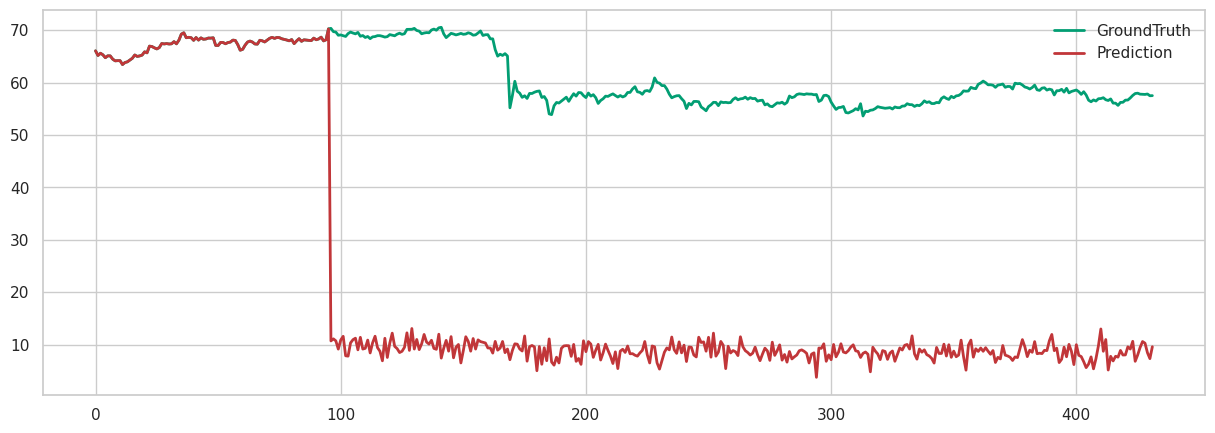

In [58]:
%%time
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [59]:
del crypto_exp

---
## Trail 4: PatchTST, Dataset: Cryptoh1,  Prediction length: 720

### Set hyperparameters
Set some parameters (Args) for the our experiment like dictionary


In [60]:
args.pred_len = 720
setting=f'{args.model}_train_on_{used_data}_{args.pred_len}_{args.num_patch}'

print(f"Hyperparameter Combination of {setting}:\n") 
print(args)

Hyperparameter Combination of PatchTST_train_on_crypto_1h_720_42:

{'use_multi_gpu': False, 'num_workers': 0, 'use_gpu': True, 'gpu': 0, 'data': 'custom', 'root_path': './Datasets/CustomData/', 'data_path': 'crypto_1h.csv', 'features': 'MS', 'target': 'Open', 'freq': 'h', 'timeenc': 1, 'embed': 'timeF', 'padding': 0, 'attn': 'prob', 'd_model': 16, 'n_heads': 4, 'factor': 5, 'dropout': 0.3, 'd_ff': 128, 'activation': 'gelu', 'mix': True, 'enc_in': 24, 'dec_in': 24, 'c_out': 1, 'e_layers': 23, 'd_layers': 1, 'seq_len': 96, 'label_len': 48, 'pred_len': 720, 'distil': True, 'output_attention': False, 'use_amp': False, 'train_only': True, 'train_epochs': 100, 'batch_size': 32, 'learning_rate': 0.01, 'lradj': 'TST', 'loss': 'mse', 'patience': 3, 'des': 'Exp', 'itr': 1, 'modes': 32, 'moving_avg': [12], 'embed_type': 1, 'model': 'PatchTST', 'checkpoints': './Checkpoints/PatchTST_checkpoints', 'fc_dropout': 0.3, 'head_dropout': 0, 'stride': 4, 'patch_len': 16, 'num_patch': 42}


### Training

In [61]:
%%time
crypto_exp = Exp(args)
crypto_exp.train(setting)

Use GPU: cuda:0
train 21960
val 2536
test 5788
	iters: 100, epoch: 1 | loss: 0.3928193
	speed: 0.0932s/iter; left time: 6386.5136s
	iters: 200, epoch: 1 | loss: 0.3431765
	speed: 0.0952s/iter; left time: 6508.8394s
	iters: 300, epoch: 1 | loss: 0.2293976
	speed: 0.0933s/iter; left time: 6371.3518s
	iters: 400, epoch: 1 | loss: 0.3223941
	speed: 0.0928s/iter; left time: 6330.6538s
	iters: 500, epoch: 1 | loss: 0.2715440
	speed: 0.0955s/iter; left time: 6502.6097s
	iters: 600, epoch: 1 | loss: 0.3636377
	speed: 0.0928s/iter; left time: 6312.2220s
Epoch: 1 cost time: 64.27496576309204
Epoch: 1, Steps: 686 | Train Loss: 0.3583347 Vali Loss: 0.4228715 Test Loss: 1740.3989258
>>> Validation loss decreased (inf --> 0.422871).  Saving model ...
Updating learning rate to 0.0004262974554665698
	iters: 100, epoch: 2 | loss: 0.2840253
	speed: 0.2574s/iter; left time: 17455.6397s
	iters: 200, epoch: 2 | loss: 0.2405745
	speed: 0.0930s/iter; left time: 6299.6779s
	iters: 300, epoch: 2 | loss: 0.3881

Model(
  (model): PatchTST_backbone(
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=16, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0-22): 23 x TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=16, out_features=16, bias=True)
              (W_K): Linear(in_features=16, out_features=16, bias=True)
              (W_V): Linear(in_features=16, out_features=16, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=16, out_features=16, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
            (norm_attn): Sequential(
              (0): Transpose()
              (

### Testing

test 5788
mae:36.47028732299805, mse:1740.3995361328125, rmse:41.71809768676758, mape:0.7798392176628113, mspe:0.6265193819999695
CPU times: user 7.01 s, sys: 425 ms, total: 7.44 s
Wall time: 7 s


<Figure size 1500x500 with 0 Axes>

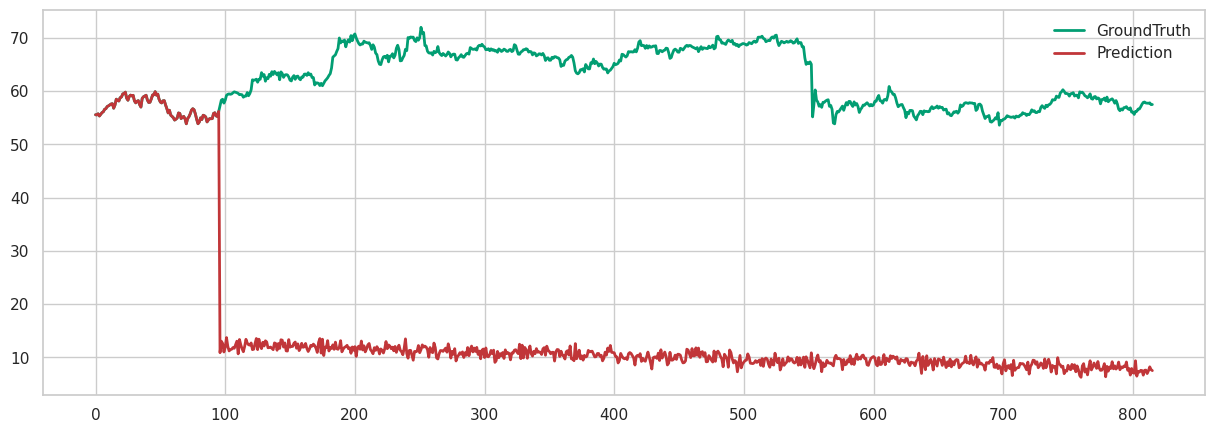

In [62]:
%%time
crypto_exp.test(setting)
torch.cuda.empty_cache()

In [63]:
del crypto_exp

### Conclusion

| Prediction Length | MAE          | MSE         | RMSE        | MAPE        | MSPE        |
|------------------|--------------|-------------|-------------|-------------|-------------|
| 96               | 35.56        | 1683.99     | 41.04       | 0.77        | 0.62        |
| 192              | 28.59        | 1095.33     | 33.10       | 0.63        | 0.40        |
| 336              | 37.32        | 1849.21     | 43.00       | 0.79        | 0.66        |
| 720              | 36.47        | 1740.40     | 41.72       | 0.78        | 0.63        |

- PatchTST is more prone to overfitting, especially when dealing with smaller datasets or datasets with noisy patterns.
- It is better than Informer
- The relatively high MAE of around 35 for the model indicates that it is struggling to accurately predict the target values. This may be due to overfitting or difficulty in capturing the underlying patterns in the data effectively.

---
# Downloading created directory from kaggle
---

In [49]:
!zip -r crypto_1h_results.zip ./results

  adding: results/ (stored 0%)
  adding: results/NLinear_train_on_crypto_1h_192/ (stored 0%)
  adding: results/NLinear_train_on_crypto_1h_192/metrics.npy (deflated 40%)
  adding: results/NLinear_train_on_crypto_1h_192/true.npy (deflated 99%)
  adding: results/NLinear_train_on_crypto_1h_192/pred.npy (deflated 20%)
  adding: results/NLinear_train_on_crypto_1h_192/x.npy (deflated 98%)
  adding: results/PatchTST_train_on_crypto_1h_720_42/ (stored 0%)
  adding: results/PatchTST_train_on_crypto_1h_720_42/metrics.npy (deflated 40%)
  adding: results/PatchTST_train_on_crypto_1h_720_42/true.npy (deflated 99%)
  adding: results/PatchTST_train_on_crypto_1h_720_42/pred.npy (deflated 15%)
  adding: results/PatchTST_train_on_crypto_1h_720_42/x.npy (deflated 98%)
  adding: results/informer_train_on_crypto_1h_192/ (stored 0%)
  adding: results/informer_train_on_crypto_1h_192/metrics.npy (deflated 40%)
  adding: results/informer_train_on_crypto_1h_192/true.npy (deflated 99%)
  adding: results/informer_

In [51]:
!zip -r crypto_1h_test_results.zip ./test_results

  adding: test_results/ (stored 0%)
  adding: test_results/NLinear_train_on_crypto_1h_192/ (stored 0%)
  adding: test_results/NLinear_train_on_crypto_1h_192/last_batch.pdf (deflated 21%)
  adding: test_results/PatchTST_train_on_crypto_1h_720_42/ (stored 0%)
  adding: test_results/PatchTST_train_on_crypto_1h_720_42/last_batch.pdf (deflated 13%)
  adding: test_results/informer_train_on_crypto_1h_192/ (stored 0%)
  adding: test_results/informer_train_on_crypto_1h_192/last_batch.pdf (deflated 25%)
  adding: test_results/PatchTST_train_on_crypto_1h_96_64/ (stored 0%)
  adding: test_results/PatchTST_train_on_crypto_1h_96_64/last_batch.pdf (deflated 25%)
  adding: test_results/PatchTST_train_on_crypto_1h_96_42/ (stored 0%)
  adding: test_results/PatchTST_train_on_crypto_1h_96_42/last_batch.pdf (deflated 25%)
  adding: test_results/FEDformer_train_on_crypto_1h_96/ (stored 0%)
  adding: test_results/FEDformer_train_on_crypto_1h_96/last_batch.pdf (deflated 24%)
  adding: test_results/DLinear_tra

In [50]:
!zip -r crypto_1h_checkpoints.zip ./Checkpoints

  adding: Checkpoints/ (stored 0%)
  adding: Checkpoints/FEDFormer_checkpoints/ (stored 0%)
  adding: Checkpoints/FEDFormer_checkpoints/FEDformer_train_on_crypto_1h_96/ (stored 0%)
  adding: Checkpoints/FEDFormer_checkpoints/FEDformer_train_on_crypto_1h_96/checkpoint.pth (deflated 8%)
  adding: Checkpoints/FEDFormer_checkpoints/FEDformer_train_on_crypto_1h_192/ (stored 0%)
  adding: Checkpoints/FEDFormer_checkpoints/FEDformer_train_on_crypto_1h_192/checkpoint.pth (deflated 8%)
  adding: Checkpoints/FEDFormer_checkpoints/FEDformer_train_on_crypto_1h_336/ (stored 0%)
  adding: Checkpoints/FEDFormer_checkpoints/FEDformer_train_on_crypto_1h_336/checkpoint.pth (deflated 8%)
  adding: Checkpoints/FEDFormer_checkpoints/FEDformer_train_on_crypto_1h_720/ (stored 0%)
  adding: Checkpoints/FEDFormer_checkpoints/FEDformer_train_on_crypto_1h_720/checkpoint.pth (deflated 8%)
  adding: Checkpoints/DLinear_checkpoints/ (stored 0%)
  adding: Checkpoints/DLinear_checkpoints/DLinear_train_on_crypto_1h_96